In [ ]:
!pip install ipython-sql
!pip install pymysql
!pip install sqlalchemy

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
import sqlite3

In [ ]:
%load_ext sql

In [ ]:
%%sql sqlite:///TMDB.db
pragma table_info(movies);

Done.


[(0, 'movie_id', 'INTEGER', 1, None, 1),
 (1, 'title', 'varchar(500)', 0, 'NULL', 0),
 (2, 'release_date', 'datetime(6)', 0, 'NULL', 0),
 (3, 'budget', 'INTEGER', 0, 'NULL', 0),
 (4, 'homepage', 'varchar(500)', 0, 'NULL', 0),
 (5, 'original_language', 'varchar(50)', 0, 'NULL', 0),
 (6, 'original_title', 'varchar(500)', 0, 'NULL', 0),
 (7, 'overview', 'varchar(5000)', 0, 'NULL', 0),
 (8, 'popularity', 'double', 0, 'NULL', 0),
 (9, 'revenue', 'double', 0, 'NULL', 0),
 (10, 'runtime', 'double', 0, 'NULL', 0),
 (11, 'release_status', 'varchar(50)', 0, 'NULL', 0),
 (12, 'tagline', 'varchar(500)', 0, 'NULL', 0),
 (13, 'vote_average', 'double', 0, 'NULL', 0),
 (14, 'vote_count', 'INTEGER', 0, 'NULL', 0)]

Exploring the Dataset (N.OfMovies,Table View of the important things in our fact table)


In [ ]:
%%sql select count(movie_id) as NumOfMovies from movies;

 * sqlite:///TMDB.db
Done.


[(4803,)]

In [ ]:
%%sql select title,budget,revenue,release_date,release_status,popularity,vote_count from movies
order by release_date;

 * sqlite:///TMDB.db
Done.


[('America Is Still the Place', 0, 0.0, None, 'Released', 0.0, 0),
 ('Intolerance', 385907, 8394751.0, '1916-09-04 00:00:00.000000', 'Released', 3.232447, 60),
 ('The Big Parade', 245000, 22000000.0, '1925-11-05 00:00:00.000000', 'Released', 0.785744, 21),
 ('Metropolis', 92620000, 650422.0, '1927-01-10 00:00:00.000000', 'Released', 32.351527, 657),
 ("Pandora's Box", 0, 0.0, '1929-01-30 00:00:00.000000', 'Released', 1.824184, 45),
 ('The Broadway Melody', 379000, 4358000.0, '1929-02-08 00:00:00.000000', 'Released', 0.968865, 19),
 ("Hell's Angels", 3950000, 8000000.0, '1930-11-15 00:00:00.000000', 'Released', 8.484123, 19),
 ('A Farewell to Arms', 4, 25.0, '1932-12-08 00:00:00.000000', 'Released', 1.199451, 28),
 ('42nd Street', 439000, 2281000.0, '1933-02-02 00:00:00.000000', 'Released', 1.933366, 37),
 ('She Done Him Wrong', 200000, 2200000.0, '1933-02-09 00:00:00.000000', 'Released', 0.622752, 27),
 ('It Happened One Night', 325000, 4500000.0, '1934-02-22 00:00:00.000000', 'Released', 11.871424, 275),
 ('Top Hat', 609000, 3202000.0, '1935-09-06 00:00:00.000000', 'Released', 3.898498, 59),
 ('Modern Times', 1, 8500000.0, '1936-02-05 00:00:00.000000', 'Released', 28.27648, 856),
 ('The Charge of the Light Brigade', 1200000, 2736000.0, '1936-10-20 00:00:00.000000', 'Released', 2.968235, 18),
 ('The Prisoner of Zenda', 0, 0.0, '1937-09-03 00:00:00.000000', 'Released', 4.021389, 11),
 ('Snow White and the Seven Dwarfs', 1488423, 184925486.0, '1937-12-20 00:00:00.000000', 'Released', 80.171283, 1914),
 ("Alexander's Ragtime Band", 2000000, 4000000.0, '1938-05-24 00:00:00.000000', 'Released', 0.483974, 6),
 ("You Can't Take It With You", 1644736, 7433101.0, '1938-08-23 00:00:00.000000', 'Released', 3.426314, 79),
 ('The Wizard of Oz', 2777000, 33754967.0, '1939-08-15 00:00:00.000000', 'Released', 67.417542, 1642),
 ('Mr. Smith Goes to Washington', 1500000, 9600000.0, '1939-10-19 00:00:00.000000', 'Released', 12.2624, 241),
 ('Gone with the Wind', 4000000, 400176459.0, '1939-12-15 00:00:00.000000', 'Released', 48.98255, 970),
 ('The Blue Bird', 0, 0.0, '1940-01-19 00:00:00.000000', 'Released', 1.280733, 8),
 ('Pinocchio', 2600000, 84300000.0, '1940-02-23 00:00:00.000000', 'Released', 46.007991, 1355),
 ('Rebecca', 1288000, 6000000.0, '1940-04-12 00:00:00.000000', 'Released', 18.426825, 336),
 ('Boom Town', 2000000, 9172000.0, '1940-08-30 00:00:00.000000', 'Released', 1.867004, 8),
 ('Fantasia', 2280000, 83320000.0, '1940-11-13 00:00:00.000000', 'Released', 32.875469, 808),
 ('How Green Was My Valley', 1250000, 6000000.0, '1941-10-28 00:00:00.000000', 'Released', 7.70019, 72),
 ('Bambi', 858000, 267447150.0, '1942-08-14 00:00:00.000000', 'Released', 47.651878, 1405),
 ('Casablanca', 878000, 10462500.0, '1942-11-26 00:00:00.000000', 'Released', 43.729123, 1422),
 ('A Guy Named Joe', 2627000, 5363000.0, '1944-03-01 00:00:00.000000', 'Released', 0.531444, 8),
 ('Bathing Beauty', 2361000, 6892000.0, '1944-07-01 00:00:00.000000', 'Released', 0.628051, 4),
 ('The Valley of Decision', 2160000, 9132000.0, '1945-06-01 00:00:00.000000', 'Released', 0.1813, 4),
 ('State Fair', 0, 0.0, '1945-08-29 00:00:00.000000', 'Released', 1.847822, 19),
 ('The Lost Weekend', 1250000, 11000000.0, '1945-11-25 00:00:00.000000', 'Released', 6.903314, 112),
 ('Spellbound', 1500000, 7000000.0, '1945-12-28 00:00:00.000000', 'Released', 11.145915, 160),
 ("It's a Wonderful Life", 3180000, 9644124.0, '1946-12-20 00:00:00.000000', 'Released', 42.868495, 1076),
 ('The Best Years of Our Lives', 2100000, 23650000.0, '1946-12-25 00:00:00.000000', 'Released', 8.38717, 143),
 ('Duel in the Sun', 6000000, 20400000.0, '1946-12-31 00:00:00.000000', 'Released', 7.60445, 37),
 ("Gentleman's Agreement", 2000000, 7800000.0, '1947-11-11 00:00:00.000000', 'Released', 5.381536, 47),
 ('The Lady from Shanghai', 2300000, 0.0, '1947-12-24 00:00:00.000000', 'Released', 8.055084, 102),
 ('Tycoon', 0, 0.0, '1947-12-27 00:00:00.000000', 'Released', 0.042442, 4),
 ('Open Secret', 0, 0.0, 

Find Duplicates


In [ ]:
%%sql SELECT title, release_date , COUNT(*) AS duplicate_count
FROM movies
GROUP BY title,release_date
HAVING duplicate_count > 1;

 * sqlite:///TMDB.db
Done.


[]

There is no Duplicates to be removed

**Exploring DataSet Trying to find insights**

---





أكبر نسبه أفلام فى الداتا سيت انجليزى فرنساوى اسبانى
الانجليزى 94% من الداتا كلها
متوزعه بين 1916و2017  

In [ ]:
%%sql SELECT COUNT(*) AS total_movies,
      substring(MIN(release_date),1,10) AS earliest_year,
      substring(MAX(release_date),1,10) AS latest_year,original_Language
      FROM movies
      group by original_Language
      order by total_movies desc;


 * sqlite:///TMDB.db
Done.


[(4505, '1916-09-04', '2017-02-03', 'en'),
 (70, '1964-12-04', '2016-03-23', 'fr'),
 (32, '1987-11-27', '2016-03-31', 'es'),
 (27, '2000-10-01', '2016-01-22', 'zh'),
 (27, '1927-01-10', '2015-11-20', 'de'),
 (19, '1998-09-16', '2016-01-22', 'hi'),
 (16, '1954-04-26', '2016-07-29', 'ja'),
 (14, '1964-09-12', '2015-12-03', 'it'),
 (12, '1994-02-03', '2015-12-19', 'cn'),
 (11, '1972-03-20', '2015-11-12', 'ru'),
 (11, '2003-01-01', '2016-07-27', 'ko'),
 (9, '1983-03-24', '2015-02-08', 'pt'),
 (7, '1955-01-09', '2012-08-28', 'da'),
 (5, '1972-12-21', '2010-01-15', 'sv'),
 (4, '1996-03-21', '2008-11-17', 'nl'),
 (4, '1997-08-01', '2011-08-26', 'fa'),
 (3, '2001-08-17', '2008-12-04', 'th'),
 (3, '2006-06-06', '2009-09-17', 'he'),
 (2, '2014-07-11', '2015-08-14', 'ta'),
 (2, '2007-08-24', '2015-06-05', 'ro'),
 (2, '2011-09-08', '2012-08-31', 'id'),
 (2, '2006-12-19', '2015-10-16', 'cs'),
 (2, '2007-07-01', '2013-06-07', 'ar'),
 (1, '1981-12-15', '1981-12-15', 'xx'),
 (1, '2006-02-22', '2006-02-22', 'vi'),
 (1, '2006-02-03', '2006-02-03', 'tr'),
 (1, '2015-07-10', '2015-07-10', 'te'),
 (1, '2015-09-17', '2015-09-17', 'sl'),
 (1, '2003-05-20', '2003-05-20', 'ps'),
 (1, '2013-10-25', '2013-10-25', 'pl'),
 (1, '2009-01-09', '2009-01-09', 'no'),
 (1, '2010-10-29', '2010-10-29', 'nb'),
 (1, '2014-08-22', '2014-08-22', 'ky'),
 (1, '2013-08-30', '2013-08-30', 'is'),
 (1, '2005-02-10', '2005-02-10', 'hu'),
 (1, '2009-06-01', '2009-06-01', 'el'),
 (1, '2005-08-18', '2005-08-18', 'af')]


الافلام موجودة بين سنه 1916 و 2017 وعددها 4803


 عدد الافلام اللى اتعملت كل سنه
وطبعا عدد الافلام بيزيد بمرور السنين لظهور شركات انتاج جديده اكتر
احنا هنا مش هنحسب 2016 لان اللى موجود منها فى الداتا 3 شهور بس

In [ ]:
%%sql SELECT COUNT(*) AS total_movies,
      substring(release_date,1,4) AS release_year
      FROM movies
      group by substring(release_date,1,4)
      order by substring(release_date,1,4);

 * sqlite:///TMDB.db
Done.


[(1, None),
 (1, '1916'),
 (1, '1925'),
 (1, '1927'),
 (2, '1929'),
 (1, '1930'),
 (1, '1932'),
 (2, '1933'),
 (1, '1934'),
 (1, '1935'),
 (2, '1936'),
 (2, '1937'),
 (2, '1938'),
 (3, '1939'),
 (5, '1940'),
 (1, '1941'),
 (2, '1942'),
 (2, '1944'),
 (4, '1945'),
 (3, '1946'),
 (3, '1947'),
 (3, '1948'),
 (2, '1949'),
 (1, '1950'),
 (3, '1951'),
 (4, '1952'),
 (4, '1953'),
 (4, '1954'),
 (2, '1955'),
 (3, '1956'),
 (2, '1957'),
 (1, '1958'),
 (3, '1959'),
 (3, '1960'),
 (5, '1961'),
 (7, '1962'),
 (8, '1963'),
 (10, '1964'),
 (8, '1965'),
 (6, '1966'),
 (4, '1967'),
 (10, '1968'),
 (10, '1969'),
 (12, '1970'),
 (10, '1971'),
 (9, '1972'),
 (9, '1973'),
 (8, '1974'),
 (6, '1975'),
 (9, '1976'),
 (16, '1977'),
 (14, '1978'),
 (16, '1979'),
 (22, '1980'),
 (33, '1981'),
 (24, '1982'),
 (23, '1983'),
 (28, '1984'),
 (28, '1985'),
 (26, '1986'),
 (31, '1987'),
 (31, '1988'),
 (32, '1989'),
 (29, '1990'),
 (30, '1991'),
 (34, '1992'),
 (47, '1993'),
 (55, '1994'),
 (70, '1995'),
 (97, '1996'),
 (112, '1997'),
 (133, '1998'),
 (171, '1999'),
 (166, '2000'),
 (183, '2001'),
 (203, '2002'),
 (169, '2003'),
 (204, '2004'),
 (217, '2005'),
 (237, '2006'),
 (195, '2007'),
 (227, '2008'),
 (247, '2009'),
 (225, '2010'),
 (223, '2011'),
 (208, '2012'),
 (231, '2013'),
 (238, '2014'),
 (216, '2015'),
 (104, '2016'),
 (1, '2017')]

In [ ]:
Relation_table = %sql select count(production_company_name) as NumOfProductionCompanies,substring(release_date,1,4)as Year from movies,productioncompanymap,productioncompanies where movies.movie_id = productioncompanymap.movie_id and productioncompanymap.production_company_id = productioncompanies.production_company_id group by substring(release_date,1,4) order by substring(release_date,1,4);
Relation_df = Relation_table.DataFrame()

 * sqlite:///TMDB.db
Done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


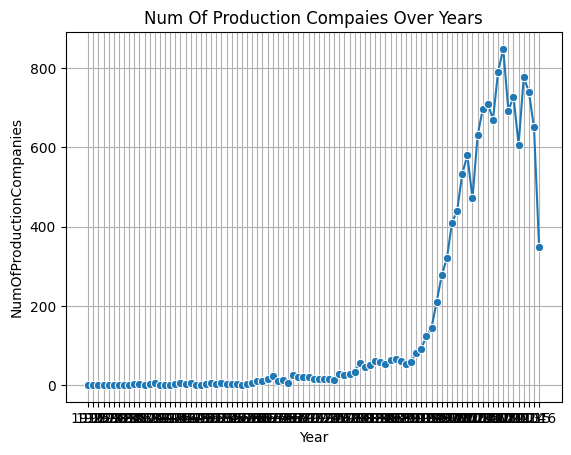

In [ ]:
sns.lineplot(data=Relation_df, x='Year', y='NumOfProductionCompanies', marker='o')
plt.title('Num Of Production Compaies Over Years')
plt.grid()
plt.show()

In [ ]:
Relationn_Table=%sql SELECT COUNT(*) AS total_movies,count(production_company_name) as NumOfProductionCompanies,substring(release_date,1,4)as Year from movies,productioncompanymap,productioncompanies where movies.movie_id = productioncompanymap.movie_id and productioncompanymap.production_company_id = productioncompanies.production_company_id group by substring(release_date,1,4) order by substring(release_date,1,4);
Relationn_df = Relationn_Table.DataFrame()

 * sqlite:///TMDB.db
Done.


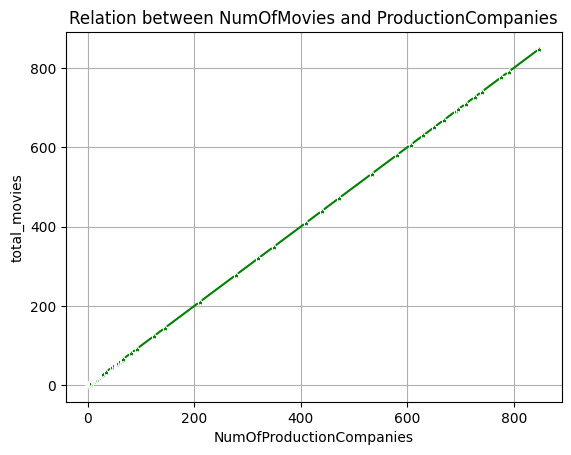

In [ ]:
sns.lineplot(data=Relationn_df, x='NumOfProductionCompanies', y='total_movies', marker='*',color='green')
plt.title('Relation between NumOfMovies and ProductionCompanies')
plt.grid()
plt.show()

family,animatiom ,science fiction

اعلى افلام فى العائد بتاعها  على الرغم انهم اقل شعبيه من حاجات تانيه اقل فى الترتيب

In [ ]:
%%sql SELECT budget,revenue,popularity, genre_name
from movies,genremap,genres
where movies.movie_id = genremap.movie_id and genremap.genre_id = genres.genre_id
group by genre_name
order by revenue desc;


 * sqlite:///TMDB.db
Done.


[(94000000, 940335536.0, 85.688789, 'Family'),
 (94000000, 940335536.0, 85.688789, 'Animation'),
 (11000000, 775398007.0, 126.393695, 'Science Fiction'),
 (11000000, 775398007.0, 126.393695, 'Adventure'),
 (11000000, 775398007.0, 126.393695, 'Action'),
 (55000000, 677945399.0, 138.133331, 'Romance'),
 (55000000, 677945399.0, 138.133331, 'Drama'),
 (90000000, 263920180.0, 109.528572, 'Thriller'),
 (90000000, 263920180.0, 109.528572, 'Fantasy'),
 (31000000, 177394432.0, 23.607392, 'History'),
 (14000000, 159157447.0, 37.380435, 'Western'),
 (72000000, 96889998.0, 32.227223, 'War'),
 (5000000, 82719885.0, 45.490374, 'Horror'),
 (10500000, 68700000.0, 86.201184, 'Mystery'),
 (12800000, 40031879.0, 22.022228, 'Music'),
 (0, 10422387.0, 2.787375, 'Foreign'),
 (4000000, 4300000.0, 22.87623, 'Crime'),
 (4000000, 4300000.0, 22.87623, 'Comedy'),
 (2600000, 3166000.0, 0.895946, 'Documentary'),
 (4200000, 0.0, 16.536374, 'TV Movie')]

family, animation

اكتر افلام بتحتاج ميزانيه   واعتقد هما اهتموا بيها كده لانها بتحقق ارباح اعلى على الرغم برده انها اقل شعبيه من حاجات تانيه

In [ ]:
%%sql SELECT budget,revenue,popularity, genre_name
from movies,genremap,genres
where movies.movie_id = genremap.movie_id and genremap.genre_id = genres.genre_id
group by genre_name
order by budget desc;

 * sqlite:///TMDB.db
Done.


[(94000000, 940335536.0, 85.688789, 'Family'),
 (94000000, 940335536.0, 85.688789, 'Animation'),
 (90000000, 263920180.0, 109.528572, 'Thriller'),
 (90000000, 263920180.0, 109.528572, 'Fantasy'),
 (72000000, 96889998.0, 32.227223, 'War'),
 (55000000, 677945399.0, 138.133331, 'Romance'),
 (55000000, 677945399.0, 138.133331, 'Drama'),
 (31000000, 177394432.0, 23.607392, 'History'),
 (14000000, 159157447.0, 37.380435, 'Western'),
 (12800000, 40031879.0, 22.022228, 'Music'),
 (11000000, 775398007.0, 126.393695, 'Science Fiction'),
 (11000000, 775398007.0, 126.393695, 'Adventure'),
 (11000000, 775398007.0, 126.393695, 'Action'),
 (10500000, 68700000.0, 86.201184, 'Mystery'),
 (5000000, 82719885.0, 45.490374, 'Horror'),
 (4200000, 0.0, 16.536374, 'TV Movie'),
 (4000000, 4300000.0, 22.87623, 'Crime'),
 (4000000, 4300000.0, 22.87623, 'Comedy'),
 (2600000, 3166000.0, 0.895946, 'Documentary'),
 (0, 10422387.0, 2.787375, 'Foreign')]

In [ ]:
PopRev_Table=%sql SELECT popularity,(revenue-budget) as profit,budget from movies;
PopRev_df = PopRev_Table.DataFrame()

 * sqlite:///TMDB.db
Done.


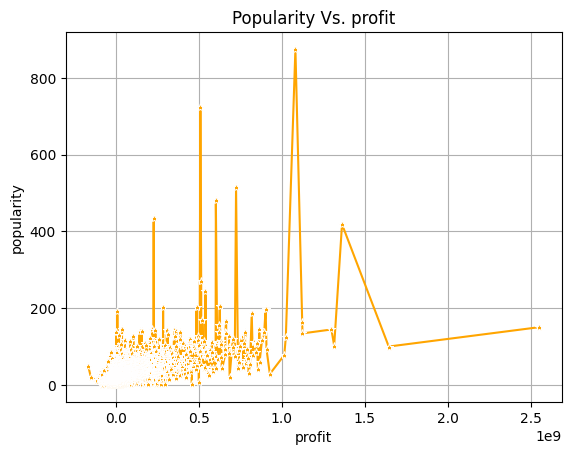

In [ ]:
sns.lineplot(data=PopRev_df, x='profit', y='popularity', marker='*',color='orange')
plt.title('Popularity Vs. profit')
plt.grid()
plt.show()

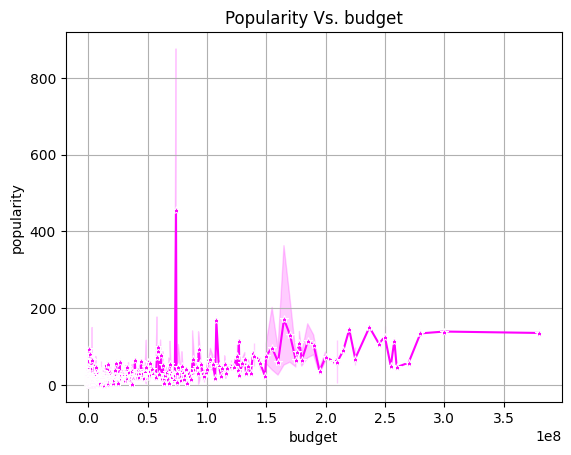

In [ ]:
sns.lineplot(data=PopRev_df, x='budget', y='popularity', marker='*',color='magenta')
plt.title('Popularity Vs. budget')
plt.grid()
plt.show()

مفيش علاقه بين تكلفه الانتج وشهرة الافلام ولا بين العائد وشهرة الافلام


Romance, Drama


واخدين اعلى شعبيه  وطبعا تكلفه الانتاج اقل

In [ ]:
%%sql SELECT budget,revenue,popularity, genre_name
from movies,genremap,genres
where movies.movie_id = genremap.movie_id and genremap.genre_id = genres.genre_id
group by genre_name
order by popularity desc;

 * sqlite:///TMDB.db
Done.


[(55000000, 677945399.0, 138.133331, 'Romance'),
 (55000000, 677945399.0, 138.133331, 'Drama'),
 (11000000, 775398007.0, 126.393695, 'Science Fiction'),
 (11000000, 775398007.0, 126.393695, 'Adventure'),
 (11000000, 775398007.0, 126.393695, 'Action'),
 (90000000, 263920180.0, 109.528572, 'Thriller'),
 (90000000, 263920180.0, 109.528572, 'Fantasy'),
 (10500000, 68700000.0, 86.201184, 'Mystery'),
 (94000000, 940335536.0, 85.688789, 'Family'),
 (94000000, 940335536.0, 85.688789, 'Animation'),
 (5000000, 82719885.0, 45.490374, 'Horror'),
 (14000000, 159157447.0, 37.380435, 'Western'),
 (72000000, 96889998.0, 32.227223, 'War'),
 (31000000, 177394432.0, 23.607392, 'History'),
 (4000000, 4300000.0, 22.87623, 'Crime'),
 (4000000, 4300000.0, 22.87623, 'Comedy'),
 (12800000, 40031879.0, 22.022228, 'Music'),
 (4200000, 0.0, 16.536374, 'TV Movie'),
 (0, 10422387.0, 2.787375, 'Foreign'),
 (2600000, 3166000.0, 0.895946, 'Documentary')]

Positive Correlation between Popularity and genre name

In [ ]:
%%sql SELECT title, popularity , vote_count
FROM movies
GROUP BY title
order by popularity desc;


 * sqlite:///TMDB.db
Done.


[('Minions', 875.581305, 4571),
 ('Interstellar', 724.247784, 10867),
 ('Deadpool', 514.569956, 10995),
 ('Guardians of the Galaxy', 481.098624, 9742),
 ('Mad Max: Fury Road', 434.278564, 9427),
 ('Jurassic World', 418.708552, 8662),
 ('Pirates of the Caribbean: The Curse of the Black Pearl', 271.972889, 6985),
 ('Dawn of the Planet of the Apes', 243.791743, 4410),
 ('The Hunger Games: Mockingjay - Part 1', 206.227151, 5584),
 ('Big Hero 6', 203.73459, 6135),
 ('Terminator Genisys', 202.042635, 3631),
 ('Captain America: Civil War', 198.372395, 7241),
 ('Whiplash', 192.528841, 4254),
 ('The Dark Knight', 187.322927, 12002),
 ('The Martian', 167.93287, 7268),
 ('Inception', 167.58371, 13752),
 ('Frozen', 165.125366, 5295),
 ('Batman v Superman: Dawn of Justice', 155.790452, 7004),
 ('Avatar', 150.437577, 11800),
 ('Fight Club', 146.757391, 9413),
 ("Pirates of the Caribbean: Dead Man's Chest", 145.847379, 5246),
 ('The Imitation Game', 145.364591, 5723),
 ('The Avengers', 144.448633, 11776),
 ('The Godfather', 143.659698, 5893),
 ('Teenage Mutant Ninja Turtles', 143.350376, 2636),
 ('Gone Girl', 143.041543, 5862),
 ('Pixels', 140.849495, 2513),
 ('Fury', 139.575085, 3946),
 ('X-Men: Apocalypse', 139.272042, 4721),
 ("Pirates of the Caribbean: At World's End", 139.082615, 4500),
 ('Rise of the Planet of the Apes', 138.433168, 4347),
 ('Forrest Gump', 138.133331, 7927),
 ('The Lord of the Rings: The Fellowship of the Ring', 138.049577, 8705),
 ('Despicable Me 2', 136.886704, 4637),
 ('The Shawshank Redemption', 136.747729, 8205),
 ('Pirates of the Caribbean: On Stranger Tides', 135.413856, 4948),
 ('Avengers: Age of Ultron', 134.279229, 6767),
 ('Harry Potter and the Chamber of Secrets', 132.397737, 5815),
 ('The Maze Runner', 131.815575, 5371),
 ('Tomorrowland', 130.311355, 2846),
 ('Inside Out', 128.655964, 6560),
 ("One Flew Over the Cuckoo's Nest", 127.525581, 2919),
 ('The Hunger Games: Mockingjay - Part 2', 127.284427, 3984),
 ('Twilight', 127.084938, 3561),
 ('Star Wars', 126.393695, 6624),
 ('Brave', 125.114374, 4641),
 ('The Lord of the Rings: The Return of the King', 123.630332, 8064),
 ('Pulp Fiction', 121.463076, 8428),
 ('The Hobbit: The Battle of the Five Armies', 120.965743, 4760),
 ('Iron Man', 120.725053, 8776),
 ('Ant-Man', 120.09361, 5880),
 ('Spirited Away', 118.968562, 3840),
 ('X-Men: Days of Future Past', 118.078691, 6032),
 ('Transformers: Age of Extinction', 116.840296, 3095),
 ('Chappie', 116.700319, 3062),
 ('Spider-Man 3', 115.699814, 3576),
 ('Night at the Museum: Secret of the Tomb', 115.597753, 1851),
 ('Lucy', 115.241998, 5878),
 ('Batman Begins', 115.040024, 7359),
 ('Mission: Impossible - Rogue Nation', 114.522237, 3224),
 ('Despicable Me', 113.858273, 6478),
 ('Maze Runner: The Scorch Trials', 113.161483, 3040),
 ('The Dark Knight Rises', 112.31295, 9106),
 ('Maleficent', 110.620647, 4496),
 ('Gravity', 110.153618, 5751),
 ("Harry Potter and the Philosopher's Stone", 109.984351, 7006),
 ('Bruce Almighty', 109.684788, 3012),
 ('The Fifth Element', 109.528572, 3885),
 ('The Hobbit: An Unexpected Journey', 108.849621, 8297),
 ('Quantum of Solace', 107.928811, 2965),
 ('Spectre', 107.376788, 4466),
 ('The Twilight Saga: Eclipse', 107.069763, 2301),
 ('The Lord of the Rings: The Two Towers', 106.914973, 7487),
 ('Monsters, Inc.', 106.815545, 5996),
 ('The Godfather: Part II', 105.792936, 3338),
 ("Schindler's List", 104.469351, 4329),
 ('The Matrix', 104.309993, 8907),
 ('Men in Black', 104.121555, 4412),
 ('Insurgent', 103.718387, 3829),
 ('The Green Mile', 103.698022, 4048),
 ('Furious 7', 102.322217, 4176),
 ('Terminator 2: Judgment Day', 101.74155, 4185),
 ('Exodus: Gods and Kings', 101.599427, 1921),
 ('Harry Potter and the Goblet of Fire', 101.250416, 5608),
 ('Cinderella', 101.187052, 2374),
 ('It Follows', 100.876794, 1832),
 ('The Revenant', 100.635882, 6396),
 ('San Andreas', 100.412364, 2968),
 ("We're the Millers", 100.348805, 2972),
 ('How to Train Your Dragon 2', 100.21391, 3106),
 ('Ti

In [ ]:
%%sql SELECT
    (COUNT(*) * SUM(popularity * vote_count) - SUM(popularity) * SUM(vote_count)) /
    (SQRT(COUNT(*) * SUM(popularity * popularity) - SUM(popularity) * SUM(popularity)) *
     SQRT(COUNT(*) * SUM(vote_count * vote_count) - SUM(vote_count) * SUM(vote_count))) AS correlation_coefficient
FROM movies;

 * sqlite:///TMDB.db
Done.


[(0.7781298890348549,)]

In [ ]:
PopGen_Table=%sql SELECT popularity,vote_count from movies;
PopGen_df = PopGen_Table.DataFrame()

 * sqlite:///TMDB.db
Done.


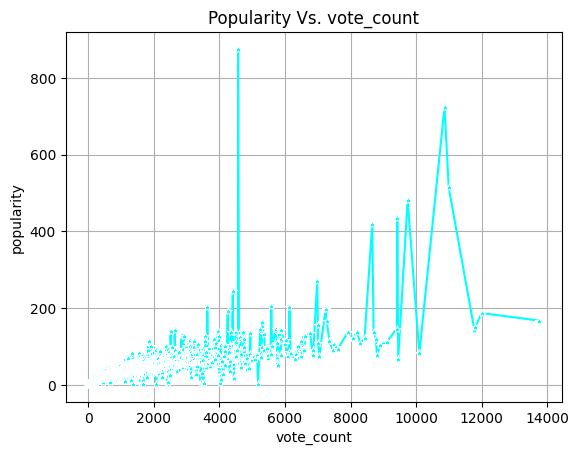

In [ ]:
sns.lineplot(data=PopGen_df, x='vote_count', y='popularity', marker='*',color='cyan')
plt.title('Popularity Vs. vote_count')
plt.grid()
plt.show()

عندى 1037 فيلم ال بادجت بتاعتهم صفر من اصل 4803
  يعنى 22% من الداتا

اكتر الافلام اللى ملهاش بادجت الدراما والكوميدى والرومانس


In [ ]:
%%sql SELECT  count(title) as movies_nums,budget,genre_name
from movies,genremap,genres
where movies.movie_id = genremap.movie_id and genremap.genre_id = genres.genre_id
and budget=0
group by genre_name
order by movies_nums desc;

 * sqlite:///TMDB.db
Done.


[(564, 0, 'Drama'),
 (411, 0, 'Comedy'),
 (214, 0, 'Romance'),
 (201, 0, 'Thriller'),
 (139, 0, 'Action'),
 (112, 0, 'Horror'),
 (103, 0, 'Family'),
 (101, 0, 'Crime'),
 (71, 0, 'Adventure'),
 (60, 0, 'Science Fiction'),
 (54, 0, 'Documentary'),
 (51, 0, 'Mystery'),
 (48, 0, 'Music'),
 (45, 0, 'Fantasy'),
 (31, 0, 'History'),
 (26, 0, 'Foreign'),
 (26, 0, 'Animation'),
 (16, 0, 'Western'),
 (12, 0, 'War'),
 (5, 0, 'TV Movie')]

In [ ]:
%%sql SELECT count(*)
from movies
where budget=0;

 * sqlite:///TMDB.db
Done.


[(1037,)]

عندى 1427 من اصل 4803 فيلم ملهمش ارباح
واكتر نسبه فى الكوميدى والدراما



In [ ]:
%%sql SELECT  count(title) as movies_nums,revenue,genre_name
from movies,genremap,genres
where movies.movie_id = genremap.movie_id and genremap.genre_id = genres.genre_id
and revenue=0
group by genre_name
order by movies_nums desc;


 * sqlite:///TMDB.db
Done.


[(770, 0.0, 'Drama'),
 (548, 0.0, 'Comedy'),
 (315, 0.0, 'Thriller'),
 (290, 0.0, 'Romance'),
 (214, 0.0, 'Action'),
 (175, 0.0, 'Horror'),
 (159, 0.0, 'Crime'),
 (131, 0.0, 'Family'),
 (115, 0.0, 'Adventure'),
 (96, 0.0, 'Science Fiction'),
 (80, 0.0, 'Mystery'),
 (73, 0.0, 'Fantasy'),
 (64, 0.0, 'Music'),
 (63, 0.0, 'Documentary'),
 (47, 0.0, 'History'),
 (43, 0.0, 'Animation'),
 (28, 0.0, 'Foreign'),
 (22, 0.0, 'War'),
 (21, 0.0, 'Western'),
 (8, 0.0, 'TV Movie')]

In [ ]:
%%sql SELECT count(*)
from movies
where revenue=0;

 * sqlite:///TMDB.db
Done.


[(1427,)]

Profit Calc

In [ ]:
%%sql SELECT
    SUM(budget) AS total_budget,
    SUM(revenue) AS total_revenue
FROM movies;

 * sqlite:///TMDB.db
Done.


[(139503326521, 395097847444.0)]

In [ ]:
%%sql SELECT
    AVG(budget) AS average_budget,
    AVG(revenue) AS average_revenue
FROM movies;

 * sqlite:///TMDB.db
Done.


[(29045039.87528628, 82260638.65167603)]

In [ ]:
%%sql SELECT
    title,
    budget,
    revenue,
    (revenue - budget) AS profit
FROM movies;

 * sqlite:///TMDB.db
Done.


[('Four Rooms', 4000000, 4300000.0, 300000.0),
 ('Star Wars', 11000000, 775398007.0, 764398007.0),
 ('Finding Nemo', 94000000, 940335536.0, 846335536.0),
 ('Forrest Gump', 55000000, 677945399.0, 622945399.0),
 ('American Beauty', 15000000, 356296601.0, 341296601.0),
 ('Dancer in the Dark', 12800000, 40031879.0, 27231879.0),
 ('The Fifth Element', 90000000, 263920180.0, 173920180.0),
 ('Metropolis', 92620000, 650422.0, -91969578.0),
 ('My Life Without Me', 0, 9726954.0, 9726954.0),
 ('Pirates of the Caribbean: The Curse of the Black Pearl', 140000000, 655011224.0, 515011224.0),
 ('Kill Bill: Vol. 1', 30000000, 180949000.0, 150949000.0),
 ('Jarhead', 72000000, 96889998.0, 24889998.0),
 ('Apocalypse Now', 31500000, 89460381.0, 57960381.0),
 ('Unforgiven', 14000000, 159157447.0, 145157447.0),
 ('The Simpsons Movie', 75000000, 527068851.0, 452068851.0),
 ('Eternal Sunshine of the Spotless Mind', 20000000, 72258126.0, 52258126.0),
 ('Amores perros', 2000000, 20908467.0, 18908467.0),
 ("Pirates of the Caribbean: Dead Man's Chest", 200000000, 1065659812.0, 865659812.0),
 ('A History of Violence', 32000000, 60740827.0, 28740827.0),
 ('2001: A Space Odyssey', 10500000, 68700000.0, 58200000.0),
 ('8 Mile', 41000000, 215000000.0, 174000000.0),
 ('Absolute Power', 50000000, 50068310.0, 68310.0),
 ('Brazil', 15000000, 0.0, -15000000.0),
 ('Walk the Line', 28000000, 186438883.0, 158438883.0),
 ('Million Dollar Baby', 30000000, 216763646.0, 186763646.0),
 ('Billy Elliot', 5000000, 110000000.0, 105000000.0),
 ('American History X', 20000000, 23875127.0, 3875127.0),
 ('War of the Worlds', 132000000, 591739379.0, 459739379.0),
 ('Mars Attacks!', 70000000, 101371017.0, 31371017.0),
 ('Before Sunrise', 2500000, 5535405.0, 3035405.0),
 ('Memento', 9000000, 39723096.0, 30723096.0),
 ('Blade Runner', 28000000, 33139618.0, 5139618.0),
 ('Hero', 31000000, 177394432.0, 146394432.0),
 ('Before Sunset', 2700000, 15992615.0, 13292615.0),
 ('Open Water', 130000, 54667954.0, 54537954.0),
 ('Raiders of the Lost Ark', 18000000, 389925971.0, 371925971.0),
 ('Indiana Jones and the Temple of Doom', 28000000, 333000000.0, 305000000.0),
 ('Indiana Jones and the Last Crusade', 48000000, 474171806.0, 426171806.0),
 ('Beverly Hills Cop', 15000000, 316360478.0, 301360478.0),
 ('Armageddon', 140000000, 553799566.0, 413799566.0),
 ('Beverly Hills Cop II', 20000000, 299965036.0, 279965036.0),
 ('Gladiator', 103000000, 457640427.0, 354640427.0),
 ('Lock, Stock and Two Smoking Barrels', 1350000, 3897569.0, 2547569.0),
 ('Taxi Driver', 1300000, 28262574.0, 26962574.0),
 ('Run Lola Run', 1530000, 7267585.0, 5737585.0),
 ('Back to the Future', 19000000, 381109762.0, 362109762.0),
 ('Predator', 18000000, 98235548.0, 80235548.0),
 ('Snatch', 10000000, 83557872.0, 73557872.0),
 ('Scarface', 25000000, 65884703.0, 40884703.0),
 ('Pretty Woman', 14000000, 463000000.0, 449000000.0),
 ('The Big Lebowski', 15000000, 46189568.0, 31189568.0),
 ('Match Point', 15000000, 85306374.0, 70306374.0),
 ('The Untouchables', 25000000, 76270454.0, 51270454.0),
 ('Charlie and the Chocolate Factory', 150000000, 474968763.0, 324968763.0),
 ('The Lord of the Rings: The Fellowship of the Ring', 93000000, 871368364.0, 778368364.0),
 ('The Lord of the Rings: The Two Towers', 79000000, 926287400.0, 847287400.0),
 ('The Lord of the Rings: The Return of the King', 94000000, 1118888979.0, 1024888979.0),
 ('Princess Mononoke', 26500000, 159375308.0, 132875308.0),
 ('Spirited Away', 15000000, 274925095.0, 259925095.0),
 ('O Brother, Where Art Thou?', 26000000, 71868327.0, 45868327.0),
 ('Groundhog Day', 14600000, 70906973.0, 56306973.0),
 ('Donnie Darko', 6000000, 1270522.0, -4729478.0),
 ('Brokeback Mountain', 14000000, 178043761.0, 164043761.0),
 ('Crouching Tiger, Hidden Dragon', 17000000, 213525736.0, 196525736.0),
 ('Akira', 8000000, 553171.0, -7446829.0),
 ('Star Trek: The Motion Picture', 35000000, 139000000.0, 104000000.0),
 ('Lost in Translation', 4000000, 119723856.0, 115723856.0),
 ('Star Trek II: Th

انهى افلام بتعمل ارباح كويسه

In [ ]:
%%sql SELECT
    title,
    budget,
    revenue,
    (revenue - budget) AS profit
FROM movies
where revenue > budget
order by profit desc;

 * sqlite:///TMDB.db
Done.


[('Avatar', 237000000, 2787965087.0, 2550965087.0),
 ('Titanic', 200000000, 1845034188.0, 1645034188.0),
 ('Jurassic World', 150000000, 1513528810.0, 1363528810.0),
 ('Furious 7', 190000000, 1506249360.0, 1316249360.0),
 ('The Avengers', 220000000, 1519557910.0, 1299557910.0),
 ('Avengers: Age of Ultron', 280000000, 1405403694.0, 1125403694.0),
 ('Frozen', 150000000, 1274219009.0, 1124219009.0),
 ('Minions', 74000000, 1156730962.0, 1082730962.0),
 ('The Lord of the Rings: The Return of the King', 94000000, 1118888979.0, 1024888979.0),
 ('Iron Man 3', 200000000, 1215439994.0, 1015439994.0),
 ('Transformers: Dark of the Moon', 195000000, 1123746996.0, 928746996.0),
 ('Skyfall', 200000000, 1108561013.0, 908561013.0),
 ('Captain America: Civil War', 250000000, 1153304495.0, 903304495.0),
 ('Despicable Me 2', 76000000, 970761885.0, 894761885.0),
 ('Transformers: Age of Extinction', 210000000, 1091405097.0, 881405097.0),
 ('Toy Story 3', 200000000, 1066969703.0, 866969703.0),
 ("Pirates of the Caribbean: Dead Man's Chest", 200000000, 1065659812.0, 865659812.0),
 ('Jurassic Park', 63000000, 920100000.0, 857100000.0),
 ("Harry Potter and the Philosopher's Stone", 125000000, 976475550.0, 851475550.0),
 ('The Lord of the Rings: The Two Towers', 79000000, 926287400.0, 847287400.0),
 ('Finding Nemo', 94000000, 940335536.0, 846335536.0),
 ('The Dark Knight Rises', 250000000, 1084939099.0, 834939099.0),
 ('Alice in Wonderland', 200000000, 1025491110.0, 825491110.0),
 ('The Dark Knight', 185000000, 1004558444.0, 819558444.0),
 ('Star Wars: Episode I - The Phantom Menace', 115000000, 924317558.0, 809317558.0),
 ('The Secret Life of Pets', 75000000, 875958308.0, 800958308.0),
 ('Ice Age: Dawn of the Dinosaurs', 90000000, 886686817.0, 796686817.0),
 ('The Jungle Book', 175000000, 966550600.0, 791550600.0),
 ('Harry Potter and the Order of the Phoenix', 150000000, 938212738.0, 788212738.0),
 ('E.T. the Extra-Terrestrial', 10500000, 792910554.0, 782410554.0),
 ('Ice Age: Continental Drift', 95000000, 877244782.0, 782244782.0),
 ('The Lord of the Rings: The Fellowship of the Ring', 93000000, 871368364.0, 778368364.0),
 ('Harry Potter and the Chamber of Secrets', 100000000, 876688482.0, 776688482.0),
 ('The Hobbit: An Unexpected Journey', 250000000, 1021103568.0, 771103568.0),
 ('Shrek 2', 150000000, 919838758.0, 769838758.0),
 ('Star Wars', 11000000, 775398007.0, 764398007.0),
 ('Harry Potter and the Goblet of Fire', 150000000, 895921036.0, 745921036.0),
 ('The Lion King', 45000000, 788241776.0, 743241776.0),
 ('Independence Day', 75000000, 816969268.0, 741969268.0),
 ('Star Wars: Episode III - Revenge of the Sith', 113000000, 850000000.0, 737000000.0),
 ('Deadpool', 58000000, 783112979.0, 725112979.0),
 ('The Hunger Games: Catching Fire', 130000000, 847423452.0, 717423452.0),
 ('The Twilight Saga: Breaking Dawn - Part 2', 120000000, 829000000.0, 709000000.0),
 ('The Hobbit: The Desolation of Smaug', 250000000, 958400000.0, 708400000.0),
 ('The Hobbit: The Battle of the Five Armies', 250000000, 956019788.0, 706019788.0),
 ('Transformers: Revenge of the Fallen', 150000000, 836297228.0, 686297228.0),
 ('Harry Potter and the Half-Blood Prince', 250000000, 933959197.0, 683959197.0),
 ('Spider-Man', 139000000, 821708551.0, 682708551.0),
 ('Inside Out', 175000000, 857611174.0, 682611174.0),
 ('Pirates of the Caribbean: On Stranger Tides', 380000000, 1045713802.0, 665713802.0),
 ('Inception', 160000000, 825532764.0, 665532764.0),
 ("Pirates of the Caribbean: At World's End", 300000000, 961000000.0, 661000000.0),
 ('The Twilight Saga: New Moon', 50000000, 709827462.0, 659827462.0),
 ('Harry Potter and the Prisoner of Azkaban', 130000000, 789804554.0, 659804554.0),
 ('The Da Vinci Code', 125000000, 767820459.0, 642820459.0),
 ('Shrek the Third', 160000000, 798958165.0, 638958165.0),
 ('Spectre', 245000000, 880674609.0, 635674609.0),
 ('Spider-Man 3', 258000000, 890871626.0, 632871626.0),
 ('The Sixth Sense', 40000000, 672806292.0, 632806292.0),
 ('The Twil

بنشوف الprofit بتاع كل سنه عشان نقدر نحدد لو فى سنه فيها ظروف معبنه مثلا اثرت على نوع الافلام او اثرت على وجود افلام اصلا


In [ ]:
%%sql SELECT
    substring(release_date,1,4) AS release_year,
    SUM(revenue)-SUM(budget) AS total_Profit

FROM movies
GROUP BY substring(release_year,1,4)
ORDER BY release_year ;

 * sqlite:///TMDB.db
Done.


[(None, 0.0),
 ('1916', 8008844.0),
 ('1925', 21755000.0),
 ('1927', -91969578.0),
 ('1929', 3979000.0),
 ('1930', 4050000.0),
 ('1932', 21.0),
 ('1933', 3842000.0),
 ('1934', 4175000.0),
 ('1935', 2593000.0),
 ('1936', 10035999.0),
 ('1937', 183437063.0),
 ('1938', 7788365.0),
 ('1939', 435254426.0),
 ('1940', 174624000.0),
 ('1941', 4750000.0),
 ('1942', 276173650.0),
 ('1944', 7267000.0),
 ('1945', 22222000.0),
 ('1946', 42414124.0),
 ('1947', 3500000.0),
 ('1948', 5268000.0),
 ('1949', 10600000.0),
 ('1950', 4231215.0),
 ('1951', 36650000.0),
 ('1952', 43929200.0),
 ('1953', 72790000.0),
 ('1954', 40161841.0),
 ('1955', 5800000.0),
 ('1956', 24300000.0),
 ('1957', 30950000.0),
 ('1958', 14570324.0),
 ('1959', 38616152.0),
 ('1960', 60593052.0),
 ('1961', 56556822.0),
 ('1962', 176863231.0),
 ('1963', 216142236.0),
 ('1964', 294034460.0),
 ('1965', 505956513.0),
 ('1966', 46372200.0),
 ('1967', 112292338.0),
 ('1968', 145535477.0),
 ('1969', 259941767.0),
 ('1970', 145174843.0),
 ('1971', 264064798.0),
 ('1972', 277170701.0),
 ('1973', 923973849.0),
 ('1974', 355082174.0),
 ('1975', 627797570.0),
 ('1976', 243433870.0),
 ('1977', 1326648920.0),
 ('1978', 831516800.0),
 ('1979', 784902891.0),
 ('1980', 1007882451.0),
 ('1981', 942528566.0),
 ('1982', 1602238694.0),
 ('1983', 1227499743.0),
 ('1984', 1344758180.0),
 ('1985', 1147059822.0),
 ('1986', 1165692986.0),
 ('1987', 1181431169.0),
 ('1988', 1609737768.0),
 ('1989', 2126611601.0),
 ('1990', 3124546854.0),
 ('1991', 1941107492.0),
 ('1992', 2918279859.0),
 ('1993', 3006052707.0),
 ('1994', 4518525504.0),
 ('1995', 4090793115.0),
 ('1996', 3970915460.0),
 ('1997', 5777079347.0),
 ('1998', 4322660783.0),
 ('1999', 5326315236.0),
 ('2000', 5499018307.0),
 ('2001', 7715853364.0),
 ('2002', 8745911387.0),
 ('2003', 8879381342.0),
 ('2004', 9853888816.0),
 ('2005', 8583004694.0),
 ('2006', 9997362773.0),
 ('2007', 10498974132.0),
 ('2008', 10991530704.0),
 ('2009', 13428184744.0),
 ('2010', 12587107307.0),
 ('2011', 12762693725.0),
 ('2012', 16877927592.0),
 ('2013', 15205612461.0),
 ('2014', 16752037278.0),
 ('2015', 16050476854.0),
 ('2016', 9708016948.0),
 ('2017', 0.0)]

In [ ]:
DropDet_Table=%sql SELECT substring(release_date,1,4) AS release_year, SUM(revenue)-SUM(budget) AS total_Profit FROM movies GROUP BY substring(release_year,1,4) ORDER BY release_year ;
DropDet_df = DropDet_Table.DataFrame()

 * sqlite:///TMDB.db
Done.


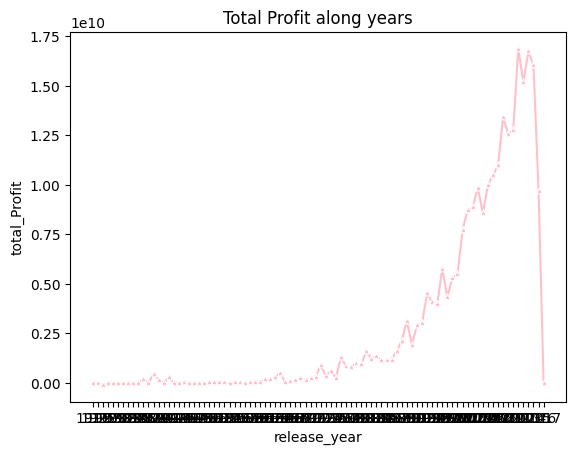

In [ ]:
sns.lineplot(data=DropDet_df, x='release_year', y='total_Profit', marker='*',color='pink')
plt.title('Total Profit along years')

plt.show()

مفيش دروب فى اخر سنه لان  2016فيها 3 شهور بس

positive relationship between budget and revenue

In [ ]:
%%sql SELECT
    (COUNT(*) * SUM(CAST(budget AS REAL) * CAST(revenue AS REAL)) - SUM(CAST(budget AS REAL)) * SUM(CAST(revenue AS REAL))) /
    (SQRT(COUNT(*) * SUM(CAST(budget AS REAL) * CAST(budget AS REAL)) - SUM(CAST(budget AS REAL)) * SUM(CAST(budget AS REAL))) *
     SQRT(COUNT(*) * SUM(CAST(revenue AS REAL) * CAST(revenue AS REAL)) - SUM(CAST(revenue AS REAL)) * SUM(CAST(revenue AS REAL))) ) AS correlation_coefficient
FROM movies
WHERE budget IS NOT NULL AND revenue IS NOT NULL;

 * sqlite:///TMDB.db
Done.


[(0.7308228569244629,)]

Top 10 actors

In [ ]:
%%sql SELECT COUNT(movies.movie_id) AS movie_count, actor_name
FROM casts,actors,movies
WHERE actors.actor_id = casts.actor_id AND casts.movie_id = movies.movie_id
GROUP BY actor_name
ORDER BY movie_count DESC
LIMIT 10;

 * sqlite:///TMDB.db
Done.


[(67, 'Samuel L. Jackson'),
 (57, 'Robert De Niro'),
 (51, 'Bruce Willis'),
 (48, 'Matt Damon'),
 (46, 'Morgan Freeman'),
 (43, 'Steve Buscemi'),
 (41, 'Liam Neeson'),
 (40, 'Owen Wilson'),
 (40, 'Johnny Depp'),
 (39, 'Nicolas Cage')]

Top production companies and movies with respect to profit


In [ ]:
%%sql SELECT title, production_company_name,(revenue-budget) as profit
FROM movies,productioncompanies, productioncompanymap
WHERE movies.movie_id = productioncompanymap.movie_id and productioncompanymap.production_company_id = productioncompanies.production_company_id
GROUP BY title
ORDER BY profit desc;



 * sqlite:///TMDB.db
Done.


[('Avatar', 'Ingenious Film Partners', 2550965087.0),
 ('Titanic', 'Paramount Pictures', 1645034188.0),
 ('Jurassic World', 'Universal Studios', 1363528810.0),
 ('Furious 7', 'Universal Pictures', 1316249360.0),
 ('The Avengers', 'Paramount Pictures', 1299557910.0),
 ('Avengers: Age of Ultron', 'Marvel Studios', 1125403694.0),
 ('Frozen', 'Walt Disney Pictures', 1124219009.0),
 ('Minions', 'Universal Pictures', 1082730962.0),
 ('The Lord of the Rings: The Return of the King', 'WingNut Films', 1024888979.0),
 ('Iron Man 3', 'Marvel Studios', 1015439994.0),
 ('Transformers: Dark of the Moon', 'Paramount Pictures', 928746996.0),
 ('Skyfall', 'Columbia Pictures', 908561013.0),
 ('Captain America: Civil War', 'Studio Babelsberg', 903304495.0),
 ('Despicable Me 2', 'Universal Pictures', 894761885.0),
 ('Transformers: Age of Extinction', 'Paramount Pictures', 881405097.0),
 ('Toy Story 3', 'Walt Disney Pictures', 866969703.0),
 ("Pirates of the Caribbean: Dead Man's Chest", 'Walt Disney Pictures', 865659812.0),
 ('Jurassic Park', 'Universal Pictures', 857100000.0),
 ("Harry Potter and the Philosopher's Stone", '1492 Pictures', 851475550.0),
 ('The Lord of the Rings: The Two Towers', 'WingNut Films', 847287400.0),
 ('Finding Nemo', 'Pixar Animation Studios', 846335536.0),
 ('The Dark Knight Rises', 'Legendary Pictures', 834939099.0),
 ('Alice in Wonderland', 'Walt Disney Pictures', 825491110.0),
 ('The Dark Knight', 'DC Comics', 819558444.0),
 ('Star Wars: Episode I - The Phantom Menace', 'Lucasfilm', 809317558.0),
 ('The Secret Life of Pets', 'Universal Pictures', 800958308.0),
 ('Ice Age: Dawn of the Dinosaurs', 'Blue Sky Studios', 796686817.0),
 ('The Jungle Book', 'Walt Disney Pictures', 791550600.0),
 ('Harry Potter and the Order of the Phoenix', 'Warner Bros.', 788212738.0),
 ('E.T. the Extra-Terrestrial', 'Universal Pictures', 782410554.0),
 ('Ice Age: Continental Drift', 'Blue Sky Studios', 782244782.0),
 ('The Lord of the Rings: The Fellowship of the Ring', 'WingNut Films', 778368364.0),
 ('Harry Potter and the Chamber of Secrets', '1492 Pictures', 776688482.0),
 ('The Hobbit: An Unexpected Journey', 'WingNut Films', 771103568.0),
 ('Shrek 2', 'DreamWorks SKG', 769838758.0),
 ('Star Wars', 'Lucasfilm', 764398007.0),
 ('Harry Potter and the Goblet of Fire', 'Patalex IV Productions Limited', 745921036.0),
 ('The Lion King', 'Walt Disney Pictures', 743241776.0),
 ('Independence Day', 'Twentieth Century Fox Film Corporation', 741969268.0),
 ('Star Wars: Episode III - Revenge of the Sith', 'Lucasfilm', 737000000.0),
 ('Deadpool', 'Twentieth Century Fox Film Corporation', 725112979.0),
 ('The Hunger Games: Catching Fire', 'Lionsgate', 717423452.0),
 ('The Twilight Saga: Breaking Dawn - Part 2', 'Summit Entertainment', 709000000.0),
 ('The Hobbit: The Desolation of Smaug', 'WingNut Films', 708400000.0),
 ('The Hobbit: The Battle of the Five Armies', 'WingNut Films', 706019788.0),
 ('Transformers: Revenge of the Fallen', 'Paramount Pictures', 686297228.0),
 ('Harry Potter and the Half-Blood Prince', 'Warner Bros.', 683959197.0),
 ('Spider-Man', 'Columbia Pictures', 682708551.0),
 ('Inside Out', 'Walt Disney Pictures', 682611174.0),
 ('Pirates of the Caribbean: On Stranger Tides', 'Walt Disney Pictures', 665713802.0),
 ('Inception', 'Legendary Pictures', 665532764.0),
 ("Pirates of the Caribbean: At World's End", 'Walt Disney Pictures', 661000000.0),
 ('The Twilight Saga: New Moon', 'Summit Entertainment', 659827462.0),
 ('Harry Potter and the Prisoner of Azkaban', '1492 Pictures', 659804554.0),
 ('The Da Vinci Code', 'Columbia Pictures', 642820459.0),
 ('Shrek the Third', 'DreamWorks SKG', 638958165.0),
 ('Spectre', 'Columbia Pictures', 635674609.0),
 ('Spider-Man 3', 'Columbia Pictures', 632871626.0),
 ('The Sixth Sense', 'Spyglass Entertainment', 632806292.0),
 ('The Twilight Saga: Eclipse', 'Summit Entertainment', 630491347.0),
 ('The Hunger Games: Mockingjay - Part 1', 'Lionsgate', 627100229.0),
 ('Batman v Superman: Dawn of Just

عدد الافلام اللى انتجتها كل شركه وارباحها

In [ ]:
%%sql SELECT count(title) as numofmovies, production_company_name,(revenue-budget) as profit
FROM movies,productioncompanies, productioncompanymap
WHERE movies.movie_id = productioncompanymap.movie_id and productioncompanymap.production_company_id = productioncompanies.production_company_id
GROUP BY production_company_name
order by numofmovies desc;

 * sqlite:///TMDB.db
Done.


[(319, 'Warner Bros.', 145157447.0),
 (311, 'Universal Pictures', 24889998.0),
 (285, 'Paramount Pictures', 622945399.0),
 (222, 'Twentieth Century Fox Film Corporation', 764398007.0),
 (201, 'Columbia Pictures', 173920180.0),
 (165, 'New Line Cinema', 28740827.0),
 (122, 'Metro-Goldwyn-Mayer (MGM)', 58200000.0),
 (118, 'Touchstone Pictures', 413799566.0),
 (114, 'Walt Disney Pictures', 515011224.0),
 (102, 'Relativity Media', 118738393.0),
 (96, 'Columbia Pictures Corporation', 26962574.0),
 (94, 'Miramax Films', 300000.0),
 (81, 'Village Roadshow Pictures', 324968763.0),
 (79, 'DreamWorks SKG', 341296601.0),
 (75, 'United Artists', 57960381.0),
 (75, 'Canal+', 27231879.0),
 (69, 'Regency Enterprises', 37853753.0),
 (64, 'Fox Searchlight Pictures', 9540607.0),
 (59, 'Dune Entertainment', 291551094.0),
 (56, 'Lionsgate', 13461007.0),
 (55, 'TriStar Pictures', 17895491.0),
 (55, 'Fox 2000 Pictures', 158438883.0),
 (54, 'Dimension Films', 118733820.0),
 (53, 'Working Title Films', 105000000.0),
 (52, 'Summit Entertainment', 30723096.0),
 (49, 'Amblin Entertainment', 459739379.0),
 (42, 'The Weinstein Company', 29308881.0),
 (41, 'StudioCanal', 105000000.0),
 (40, 'New Regency Pictures', 368207520.0),
 (40, 'Castle Rock Entertainment', 68310.0),
 (39, 'Screen Gems', 73557872.0),
 (38, 'Spyglass Entertainment', 404572835.0),
 (38, 'BBC Films', 105000000.0),
 (37, 'Scott Rudin Productions', 61196498.0),
 (36, 'UK Film Council', 73078482.0),
 (36, 'Imagine Entertainment', 174000000.0),
 (36, 'Focus Features', 52258126.0),
 (36, 'Film4', 27231879.0),
 (34, 'Revolution Studios', 80989651.0),
 (34, 'Lions Gate Films', 102711669.0),
 (34, 'Legendary Pictures', 819558444.0),
 (34, 'Lakeshore Entertainment', 186763646.0),
 (34, 'Davis Entertainment', 80235548.0),
 (33, 'Silver Pictures', 80235548.0),
 (32, 'Happy Madison Productions', 121482882.0),
 (32, 'Epsilon Motion Pictures', 186763646.0),
 (31, 'DreamWorks Animation', 162452832.0),
 (30, 'Original Film', 160350661.0),
 (29, 'Millennium Films', 10664721.0),
 (29, 'Ingenious Film Partners', 27584901.0),
 (29, 'Hollywood Pictures', 632806292.0),
 (28, 'Scott Free Productions', 354640427.0),
 (27, 'TSG Entertainment', 224681935.0),
 (26, 'Studio Babelsberg', 101183863.0),
 (26, 'Dune Entertainment III', 45569869.0),
 (25, 'NPV Entertainment', 365717150.0),
 (24, 'Participant Media', 44000000.0),
 (24, 'EuropaCorp', 75965753.0),
 (23, 'Morgan Creek Productions', -218449.0),
 (23, 'MTV Films', -12000000.0),
 (22, 'Nickelodeon Movies', 96282949.0),
 (22, 'Intermedia Films', 2315140.0),
 (22, 'Eon Productions', 154777836.0),
 (22, 'Blumhouse Productions', 193340800.0),
 (22, 'Alcon Entertainment', 67714830.0),
 (21, 'Jerry Bruckheimer Films', 515011224.0),
 (20, 'France 2 CinTma', 14641323.0),
 (20, 'Constantin Film Produktion', 27231879.0),
 (20, 'Apatow Productions', 189076518.0),
 (19, 'Malpaso Productions', 145157447.0),
 (19, 'Di Bonaventura Pictures', 559709780.0),
 (19, '40 Acres & A Mule Filmworks', 139376254.0),
 (18, 'Wild Bunch', 27341770.0),
 (18, 'Walden Media', 568806957.0),
 (17, 'TF1 Films Production', 20401898.0),
 (17, 'Studio Canal', 45868327.0),
 (17, 'Phoenix Pictures', -45549103.0),
 (17, 'Anonymous Content', 52258126.0),
 (17, '1492 Pictures', 851475550.0),
 (16, 'Vertigo Entertainment', 199847354.0),
 (16, 'Sony Pictures Classics', 196525736.0),
 (16, 'Revolution Sun Studios', 101183863.0),
 (16, 'PolyGram Filmed Entertainment', 2547569.0),
 (16, 'Pixar Animation Studios', 846335536.0),
 (16, 'Orion Pictures', 71971200.0),
 (16, 'Mirage Enterprises', 82944923.0),
 (16, 'Marvel Enterprises', 682708551.0),
 (16, 'Franchise Pictures', 65071651.0),
 (16, 'Dark Castle Entertainment', 22771059.0),
 (15, 'Lucasfilm', 764398007.0),
 (15, 'Jersey Films', 24281723.0),
 (15, 'Double Feature Films', 24281723.0),
 (15, 'Dino De Laurentiis Company', -11000000.0),
 (15, 'DC Comics', 28740827.0),
 (14, 'Tribeca Productions', 49256513.0),
 (14, 'TTlTfilm Canada', 251818.0),
 (14, 'Si

In [ ]:
%%sql create view  WarnerprosGenre as
SELECT movies.title, genres.genre_name
FROM movies
JOIN genremap ON movies.movie_id = genremap.movie_id
JOIN genres ON genremap.genre_id = genres.genre_id
JOIN productioncompanymap ON movies.movie_id = productioncompanymap.movie_id
JOIN productioncompanies ON productioncompanymap.production_company_id = productioncompanies.production_company_id
WHERE productioncompanies.production_company_name = 'Warner Bros.'


 * sqlite:///TMDB.db
Done.


[]

In [ ]:
%%sql select genre_name, count(genre_name) as Count from WarnerprosGenre
group by genre_name
order by Count Desc;

 * sqlite:///TMDB.db
Done.


[('Drama', 151),
 ('Action', 112),
 ('Thriller', 105),
 ('Comedy', 93),
 ('Adventure', 81),
 ('Crime', 69),
 ('Fantasy', 54),
 ('Romance', 47),
 ('Science Fiction', 44),
 ('Mystery', 40),
 ('Family', 29),
 ('Horror', 21),
 ('War', 13),
 ('History', 13),
 ('Music', 11),
 ('Animation', 11),
 ('Western', 8),
 ('Documentary', 2)]

In [ ]:
%%sql create VIEW WarnerprosGenre1 AS
SELECT movies.title,(revenue-budget) as profit, genres.genre_name
FROM movies
JOIN genremap ON movies.movie_id = genremap.movie_id
JOIN genres ON genremap.genre_id = genres.genre_id
JOIN productioncompanymap ON movies.movie_id = productioncompanymap.movie_id
JOIN productioncompanies ON productioncompanymap.production_company_id = productioncompanies.production_company_id
WHERE productioncompanies.production_company_name = 'Warner Bros.'

 * sqlite:///TMDB.db
Done.


[]

In [ ]:
%%sql select  title,profit  from WarnerprosGenre1
where genre_name = 'Drama'
order by profit desc;

 * sqlite:///TMDB.db
Done.


[('The Dark Knight Rises', 834939099.0),
 ('The Dark Knight', 819558444.0),
 ('Gravity', 611392705.0),
 ('Interstellar', 510120017.0),
 ('I Am Legend', 435349010.0),
 ('The Exorcist', 433306145.0),
 ('Twister', 402471524.0),
 ('The Bodyguard', 386006740.0),
 ('Slumdog Millionaire', 362910544.0),
 ('San Andreas', 360490832.0),
 ('Troy', 322409852.0),
 ('The Last Samurai', 316758981.0),
 ('The Great Gatsby', 246040419.0),
 ('Gran Torino', 236958228.0),
 ('The Green Mile', 224600000.0),
 ('Batman Begins', 224218673.0),
 ('The Perfect Storm', 205756637.0),
 ('The Departed', 199847354.0),
 ('Argo', 187824128.0),
 ('Million Dollar Baby', 186763646.0),
 ("Something's Gotta Give", 186728738.0),
 ('The Curious Case of Benjamin Button', 183932083.0),
 ('JFK', 165405498.0),
 ('Disclosure', 159015089.0),
 ('The Bridges of Madison County', 158016617.0),
 ('The Pelican Brief', 150268056.0),
 ('Due Date', 146780824.0),
 ('City of Angels', 143685114.0),
 ('Eraser', 142295562.0),
 ('Outbreak', 139859560.0),
 ('Creed', 136567581.0),
 ('A.I. Artificial Intelligence', 135926552.0),
 ('Mystic River', 131822020.0),
 ('The Color Purple', 131292009.0),
 ('Sleepers', 121615285.0),
 ('The Town', 117026136.0),
 ('A Time to Kill', 112266007.0),
 ('Magic Mike XXL', 107713057.0),
 ("One Flew Over the Cuckoo's Nest", 105981275.0),
 ('Eyes Wide Shut', 97091208.0),
 ("The Devil's Advocate", 95944660.0),
 ('Crazy, Stupid, Love.', 92851197.0),
 ('L.A. Confidential', 91216940.0),
 ('The Phantom of the Opera', 84648887.0),
 ('Contact', 81120329.0),
 ('Contagion', 77551594.0),
 ('The Lake House', 74830111.0),
 ('The Lucky One', 74357138.0),
 ('The Client', 72615211.0),
 ('Blood Diamond', 70877916.0),
 ('The Prestige', 69676311.0),
 ('Executive Decision', 66969216.0),
 ('Invictus', 62233971.0),
 ('Conspiracy Theory', 61982834.0),
 ('Training Day', 59876233.0),
 ('Hereafter', 55197635.0),
 ('My Fair Lady', 55070731.0),
 ('42', 55020213.0),
 ('Chariots of Fire', 53472904.0),
 ('Letters from Iwo Jima', 49673228.0),
 ('Any Given Sunday', 45230832.0),
 ('Gangster Squad', 45200903.0),
 ('Syriana', 44000000.0),
 ('Body of Lies', 43280098.0),
 ('August Rush', 41122026.0),
 ('Amadeus', 33973029.0),
 ('The Judge', 33719388.0),
 ('Cradle 2 the Grave', 31489558.0),
 ('A Walk to Remember', 30227069.0),
 ('Jersey Boys', 27347013.0),
 ('Sweet November', 25754228.0),
 ('Her', 24351251.0),
 ('Max', 23967255.0),
 ('The Outsiders', 23697647.0),
 ('Poseidon', 21674817.0),
 ('This Is Where I Leave You', 21496320.0),
 ('Dangerous Liaisons', 20670720.0),
 ('Zodiac', 19785914.0),
 ('Twilight Zone: The Movie', 19450919.0),
 ('127 Hours', 17692920.0),
 ('Pay It Forward', 15707411.0),
 ('Extremely Loud & Incredibly Close', 15247881.0),
 ('Malcolm X', 14169908.0),
 ('The Informant!', 13424826.0),
 ('Alexander', 12298192.0),
 ('Queen of the Damned', 10479110.0),
 ('Casablanca', 9584500.0),
 ("The Nun's Story", 9300000.0),
 ('Barry Lyndon', 9000000.0),
 ('Tin Cup', 8854588.0),
 ('Harper', 8500000.0),
 ('Murder by Numbers', 6714147.0),
 ('A Streetcar Named Desire', 6200000.0),
 ('Moby Dick', 5900000.0),
 ('Lucky You', 5761917.0),
 ('The Best Offer', 5755873.0),
 ('Blade Runner', 5139618.0),
 ('The Charge of the Light Brigade', 1536000.0),
 ('ATL', 1170563.0),
 ('Beautiful Creatures', 52138.0),
 ('White Oleander', 0.0),
 ('Coco Before Chanel', 0.0),
 ('My Fellow Americans', 0.0),
 ('Trouble with the Curve', 0.0),
 ('Ladyhawke', -1568000.0),
 ('Quest for Camelot', -1827500.0),
 ('Krush Groove', -3000000.0),
 ('Home Fries', -4556684.0),
 ('Edge of Darkness', -5098661.0),
 ('Centurion', -5185211.0),
 ('The Negotiator', -5452319.0),
 ('The Right Stuff', -5500000.0),
 ('R100', -5500000.0),
 ('In the Heart of the Sea', -6179242.0),
 ('Collateral Damage', -6617567.0),
 ('The NeverEnding Story', -6841192.0),
 ('My Dog Skip', -7000000.0),
 ('Inherent Vice', -8889025.0),
 ('Gossip', -8891180.0),
 ('North Country', -9775758.0),
 ('Midnight in the Garden of Good and Evil', -9894745.0),
 ('Michael Collins', -

In [ ]:
%%sql select  max(profit) as max ,min(profit)min  from WarnerprosGenre1
;

 * sqlite:///TMDB.db
Done.


[(851475550.0, -65000000.0)]

In [ ]:
%%sql select  title,genre_name  from WarnerprosGenre1
where profit=-65000000.0
;

 * sqlite:///TMDB.db
Done.


[('Proof of Life', 'Adventure'),
 ('Proof of Life', 'Drama'),
 ('Proof of Life', 'Action'),
 ('Proof of Life', 'Thriller'),
 ('Proof of Life', 'Romance')]